## About

`auto EDA for time-series` は探索的データ分析 (EDA) を省力化するためのツールです

できること

以下の一連の手続きをJupyter Notebook上で手早く分析することができます

- データの初回分析としての可視化
- 可視化を受けてのデータクレンジング
- クレンジング後の結果確認といった一連の手続き


    Environment: Python3.6 (Anaconda)
    Requirement (python): numpy, pandas, matplotlib, seaborn, scikit-learn
    Requirement (jupyter): jupyter_contrib_nbextensions (Table of Content)
    Author: FRI) H.Shibata
    Last update: 2018.10.16

## How to use

1. Modify cells in data preparation section (path of `read_csv()`, name of `time_column` and `obj_column`)
2. Execute `Cell -> Run All`
3. Execite `File -> Download as -> HTML`

## Preparation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from mylib.my_module import *
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.notebook_repr_html = True
pd.options.display.precision = 3

## Data preparation

### Import

    デフォルトではpd.read_csv()をするだけ
    オプションが必要な場合、セル内のコードを変更すること

In [2]:
# change args of read_csv depending on your data
df = pd.read_csv("./data/ozone.csv", na_values="?")
display(df.shape)
df.head()

(2536, 74)

,Date,WSR0,WSR1,WSR2,WSR3,WSR4,WSR5,WSR6,WSR7,WSR8,WSR9,WSR10,WSR11,WSR12,WSR13,WSR14,WSR15,WSR16,WSR17,WSR18,WSR19,WSR20,WSR21,WSR22,WSR23,WSR_PK,WSR_AV,T0,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18,T19,T20,T21,T22,T23,T_PK,T_AV,T85,RH85,U85,V85,HT85,T70,RH70,U70,V70,HT70,T50,RH50,U50,V50,HT50,KI,TT,SLP,SLP_,Precp,Ozone
0,1/1/1998,0.8,1.8,2.4,2.1,2.0,2.1,1.5,1.7,1.9,2.3,3.7,5.5,5.1,5.4,5.4,4.7,4.3,3.5,3.5,2.9,3.2,3.2,2.8,2.6,5.5,3.1,5.2,6.1,6.1,6.1,6.1,5.6,5.2,5.4,7.2,10.6,14.5,17.2,18.3,18.9,19.1,18.9,18.3,17.3,16.8,16.1,15.4,14.9,14.8,15.0,19.1,12.5,6.7,0.11,3.83,0.14,1612.0,-2.3,0.30,7.18,0.12,3178.5,-15.5,0.15,10.67,-1.56,5795.0,-12.10,17.9,10330.0,-55.0,0.00,0
1,1/2/1998,2.8,3.2,3.3,2.7,3.3,3.2,2.9,2.8,3.1,3.4,4.2,4.5,4.5,4.3,5.5,5.1,3.8,3.0,2.6,3.0,2.2,2.3,2.5,2.8,5.5,3.4,15.1,15.3,15.6,15.6,15.9,16.2,16.2,16.2,16.6,17.8,19.4,20.6,21.2,21.8,22.4,22.1,20.8,19.1,18.1,17.2,16.5,16.1,16.0,16.2,22.4,17.8,9.0,0.25,-0.41,9.53,1594.5,-2.2,0.96,8.24,7.30,3172.0,-14.5,0.48,8.39,3.84,5805.0,14.05,29.0,10275.0,-55.0,0.00,0
2,1/3/1998,2.9,2.8,2.6,2.1,2.2,2.5,2.5,2.7,2.2,2.5,3.1,4.0,4.4,4.6,5.6,5.4,5.2,4.4,3.5,2.7,2.9,3.9,4.1,4.6,5.6,3.5,16.6,16.7,16.7,16.8,16.8,16.8,16.9,16.9,17.1,17.6,19.1,21.3,21.8,22.0,22.1,22.2,21.3,19.8,18.6,18.0,18.0,18.2,18.3,18.4,22.2,18.7,9.0,0.56,0.89,10.17,1568.5,0.9,0.54,3.80,4.42,3160.0,-15.9,0.60,6.94,9.80,5790.0,17.90,41.3,10235.0,-40.0,0.00,0
3,1/4/1998,4.7,3.8,3.7,3.8,2.9,3.1,2.8,2.5,2.4,3.1,3.3,3.1,2.3,2.1,2.2,3.8,2.8,2.4,1.9,3.2,4.1,3.9,4.5,4.3,4.7,3.2,18.3,18.2,18.3,18.4,18.6,18.6,18.5,18.7,18.6,18.8,19.0,19.0,19.3,19.4,19.6,19.2,18.9,18.8,18.6,18.5,18.3,18.5,18.8,18.9,19.6,18.7,9.9,0.89,-0.34,8.58,1546.5,3.0,0.77,4.17,8.11,3145.5,-16.8,0.49,8.73,10.54,5775.0,31.15,51.7,10195.0,-40.0,2.08,0
4,1/5/1998,2.6,2.1,1.6,1.4,0.9,1.5,1.2,1.4,1.3,1.4,2.2,2.0,3.0,3.0,3.1,3.1,2.7,3.0,2.4,2.8,2.5,2.5,3.7,3.4,3.7,2.3,18.8,18.6,18.5,18.5,18.6,18.9,19.2,19.4,19.8,20.5,21.1,21.9,23.8,25.1,25.8,26.0,25.6,24.2,22.9,21.6,20.0,19.5,19.1,19.1,26.0,21.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.58,0


### Define column

    目的変数および時系列参照用のカラムの定義
    データに応じてカラム名を変更すること

In [3]:
obj_column = "Ozone"
time_column = "Date"
df[[time_column]] = pd.to_datetime(df[time_column]) # 時系列のカラムが日時型のデータの場合にコメントアウト

### Cleansing

    必要に応じてデータ加工スクリプトを以下のセルに書く
    
    例
    - 基礎分析に不要なカラムの除外 (ID列とか)
    - 0/1や1~5のintなどのデータを数値からカテゴリに変換する (df[col]=df[col].astype("object"))
    - 以降の分析結果をフィードバックして再分析したい場合

In [4]:
#

## Chronological change
  
    データの時系列的な変化の可視化
    同じ時点のデータが複数ある場合、平均値をプロットする

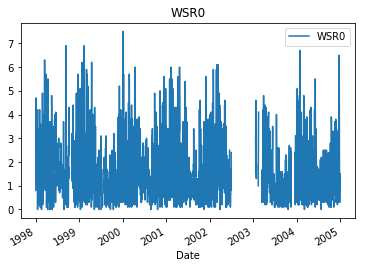

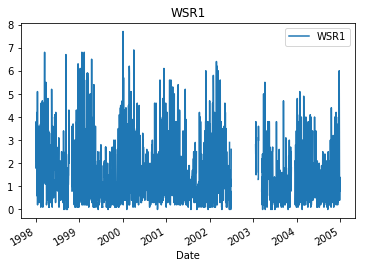

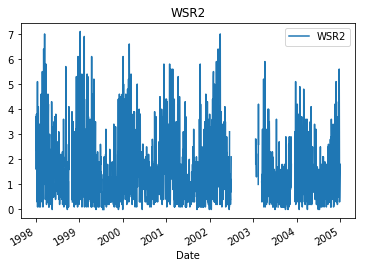

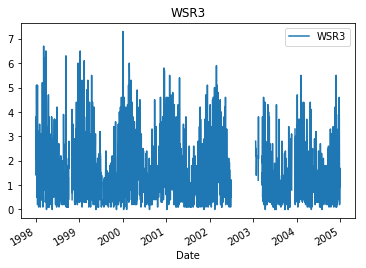

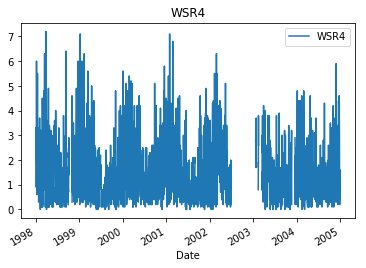

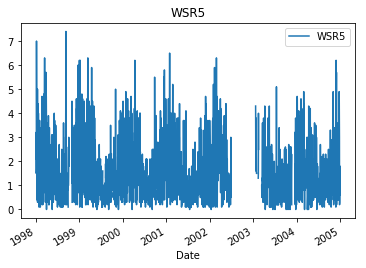

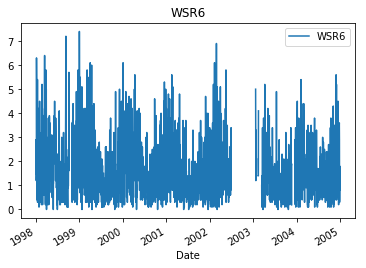

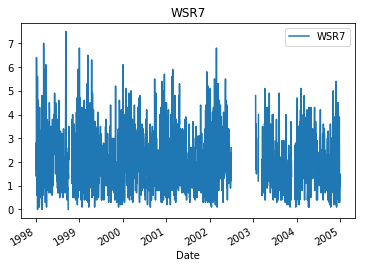

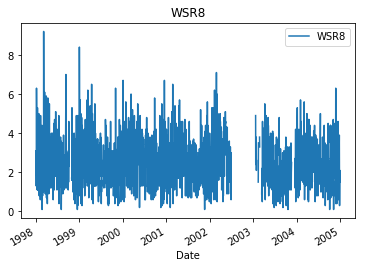

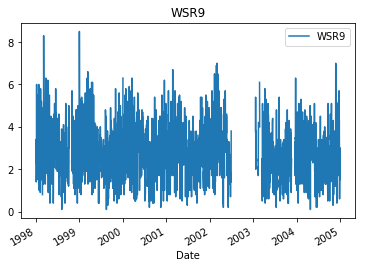

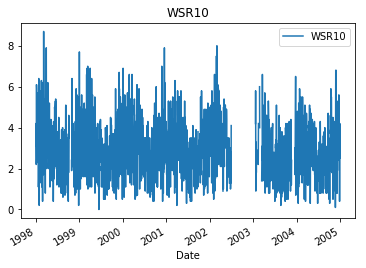

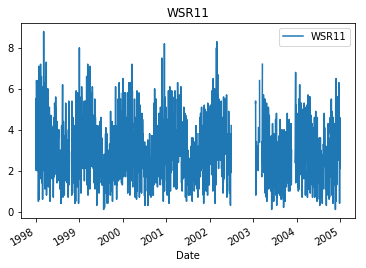

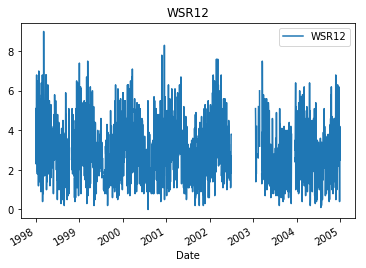

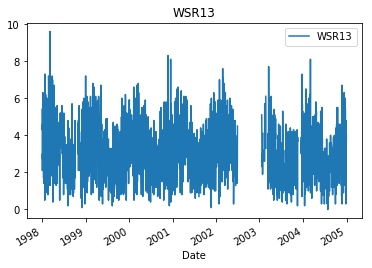

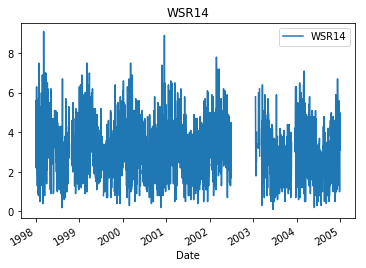

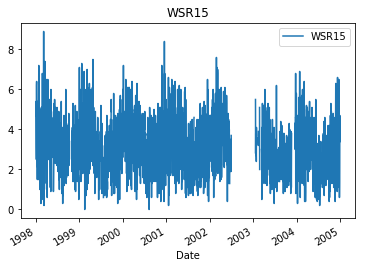

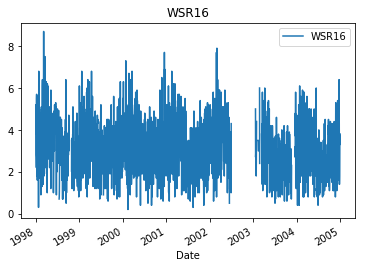

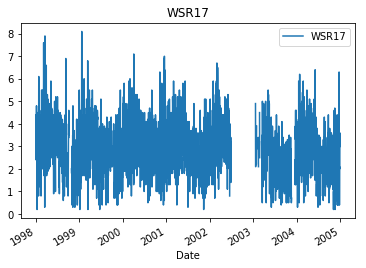

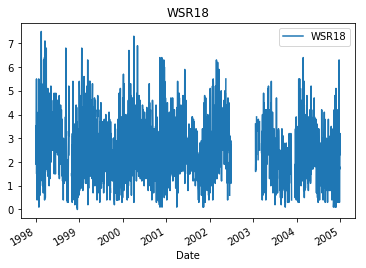

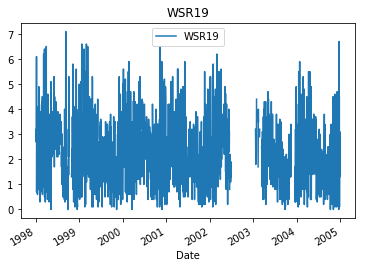

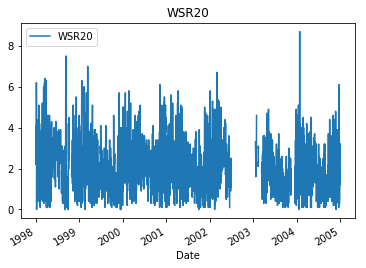

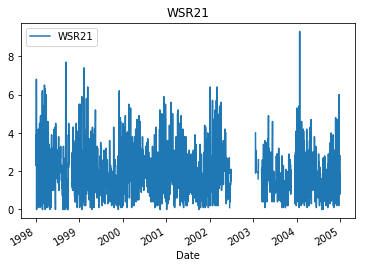

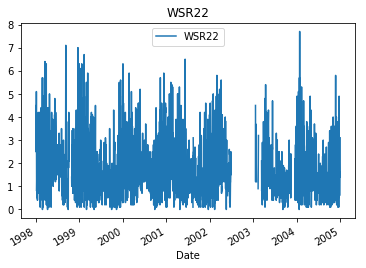

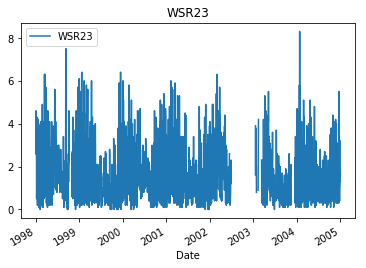

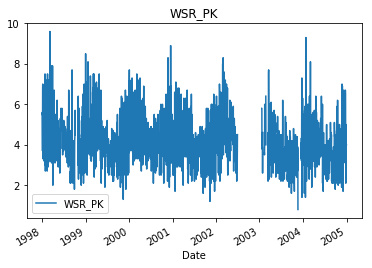

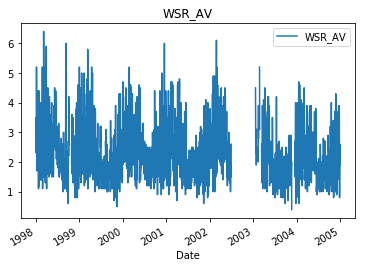

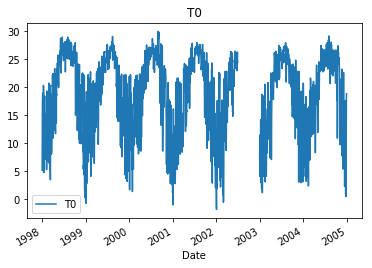

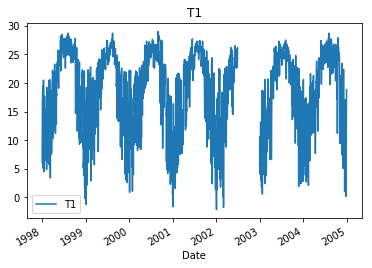

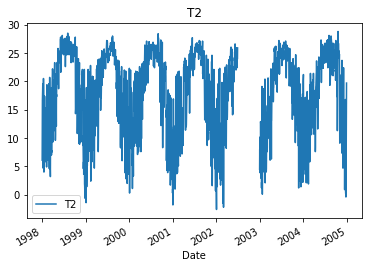

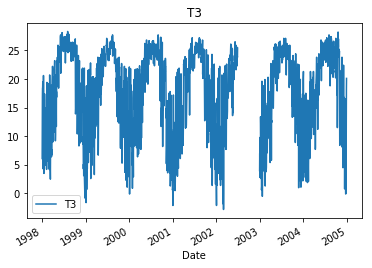

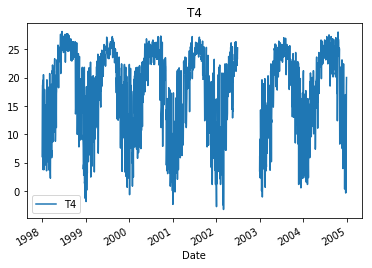

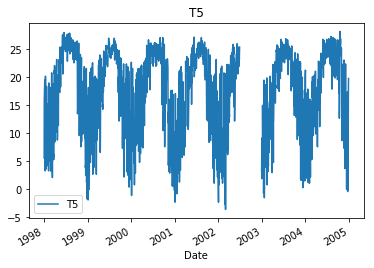

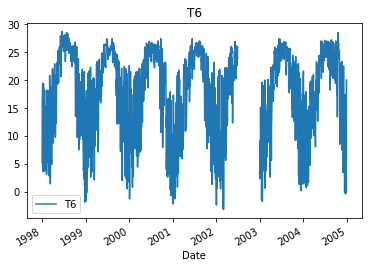

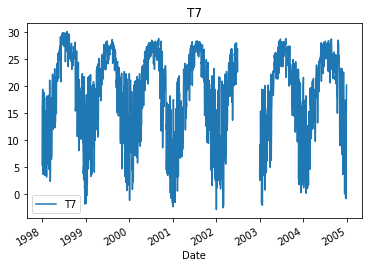

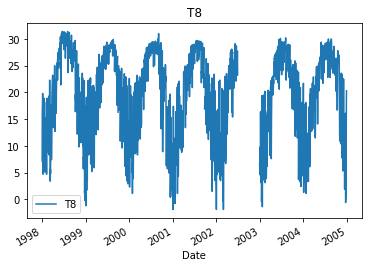

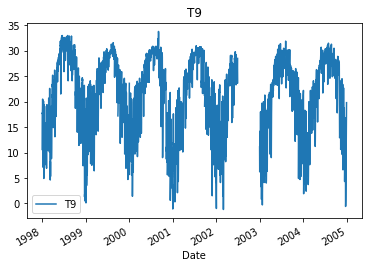

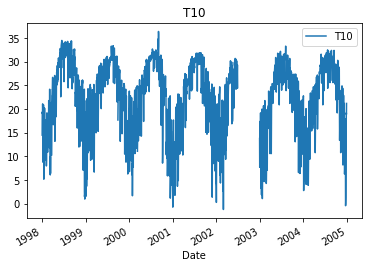

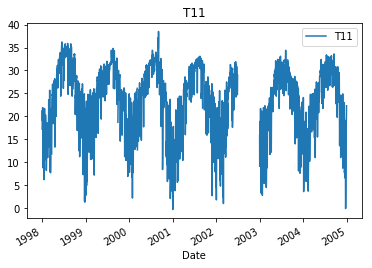

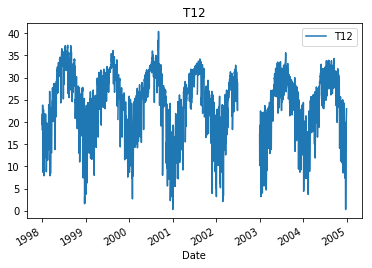

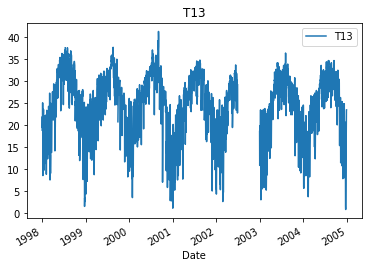

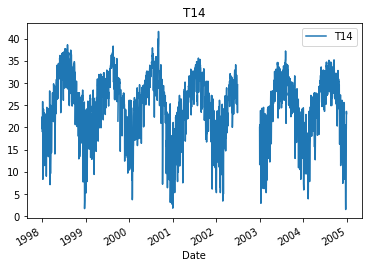

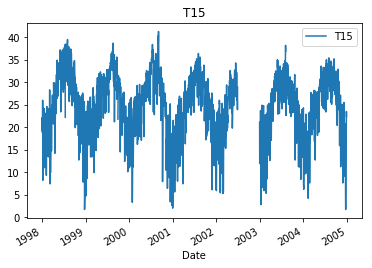

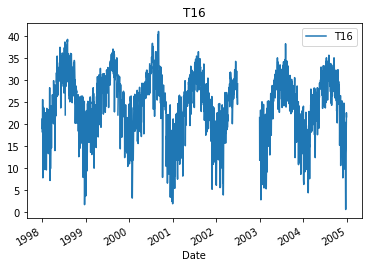

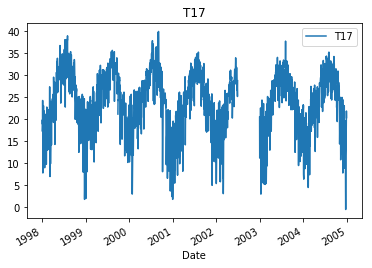

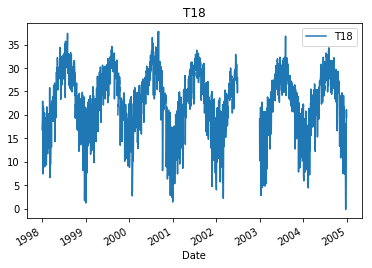

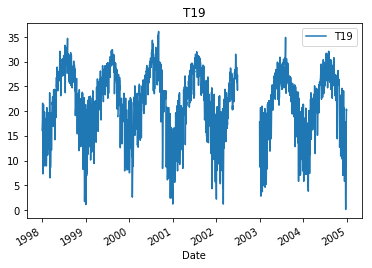

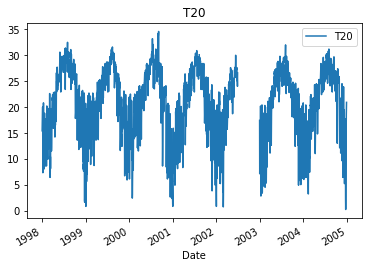

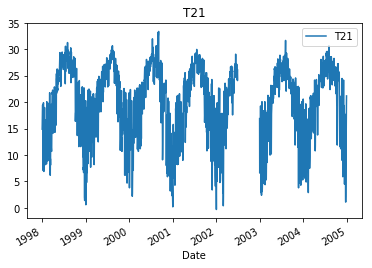

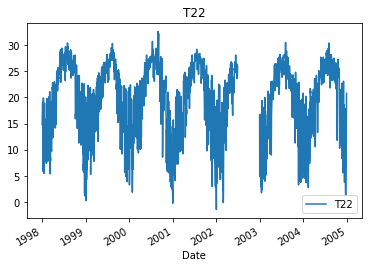

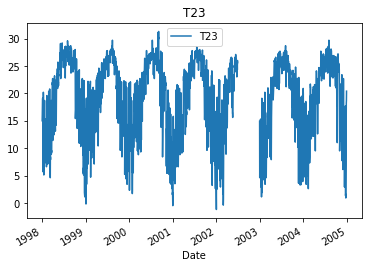

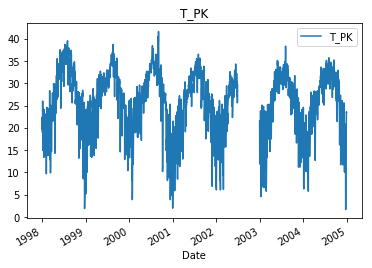

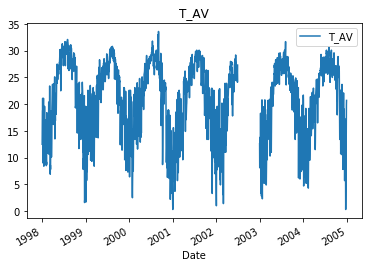

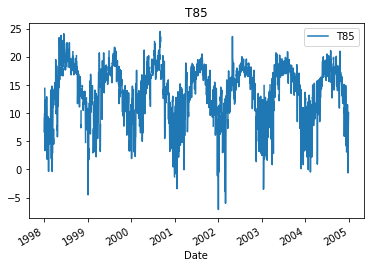

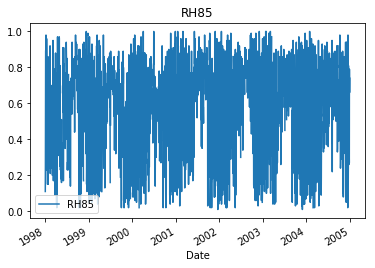

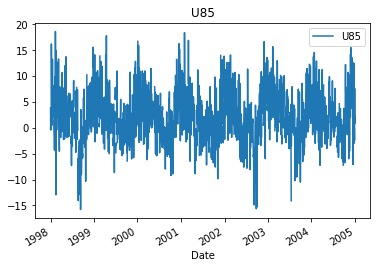

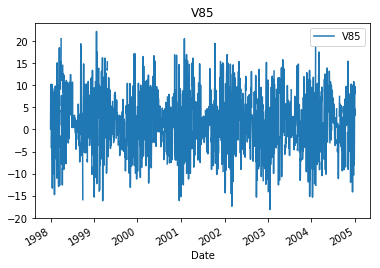

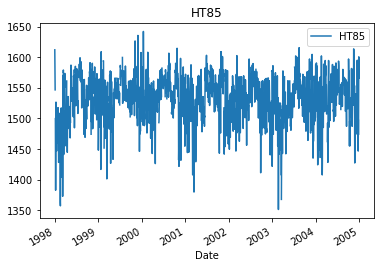

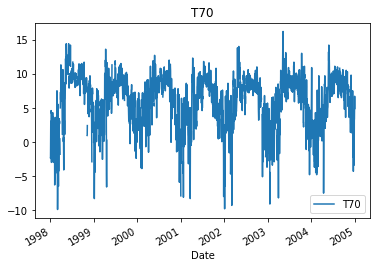

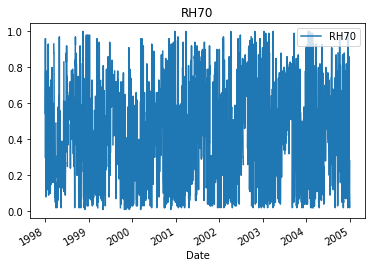

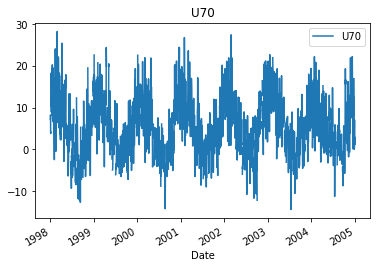

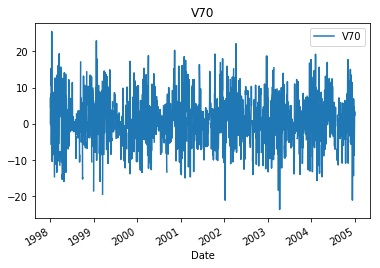

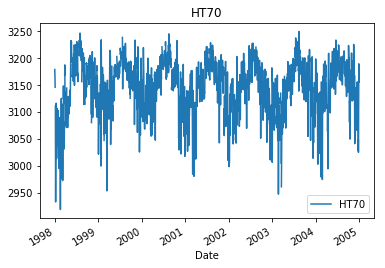

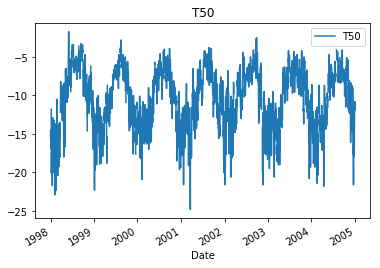

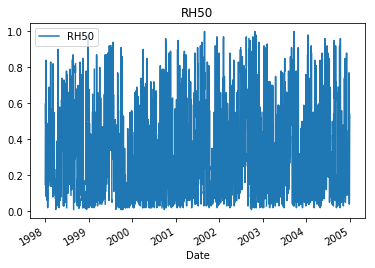

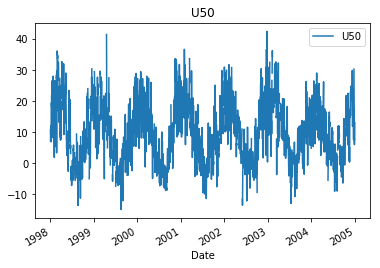

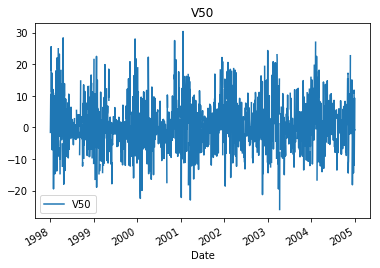

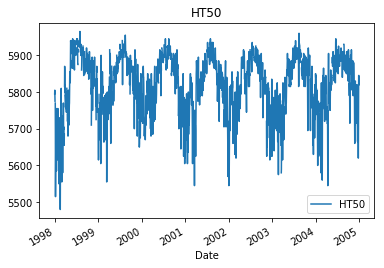

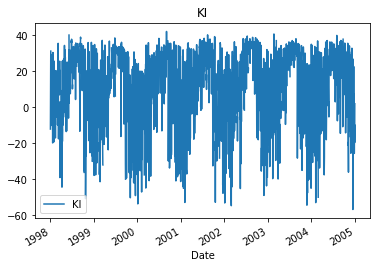

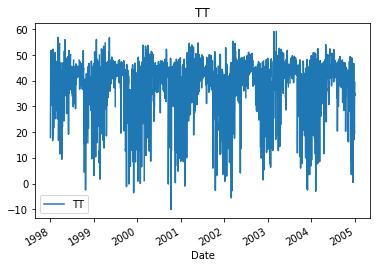

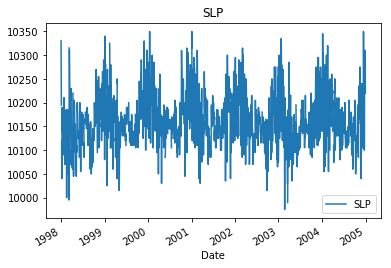

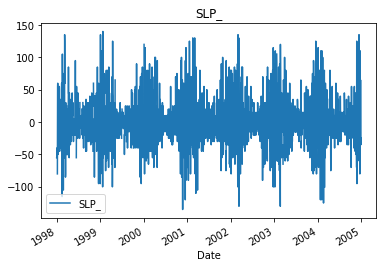

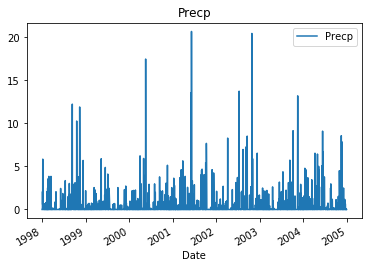

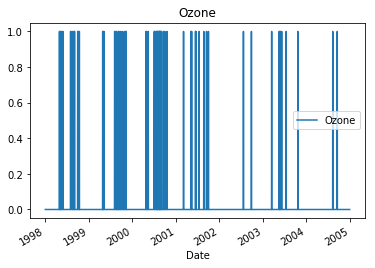

In [5]:
col_num = df.select_dtypes("number").columns.ravel()
outdir = "output/fig/timeseries"
mkdir(outdir)
for i, name in enumerate(col_num):
    fig = df.groupby(time_column).agg({name:"mean"}).plot(y=name, kind="line", title=name)
    plt.savefig(outdir+"/"+name+".png")
    plt.show()
    plt.close('all')

## Basic stats summary
  
    各カラムの基本統計量
    共通：値の数、NA数
    時間：最初と最後
    数値：平均、標準偏差、最小値、25%ile, ..., 最大値
    カテゴリ：最頻値、最頻値のカウント

In [6]:
desc = df.describe(include='all')
desc.loc["NA_count"] = (df.isna().sum())
desc = desc.T
outdir = "output/csv"
mkdir(outdir)
desc.to_csv(outdir+"/stats_summary.csv")
desc

Create directory: output/csv


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max,NA_count
Date,2536,2536,1999-03-23 00:00:00,1,1998-01-01 00:00:00,2004-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
WSR0,2.24e+03,NaN,NaN,NaN,NaN,NaN,1.64,1.27,0,0.6,1.3,2.4,7.5,299
WSR1,2.24e+03,NaN,NaN,NaN,NaN,NaN,1.59,1.27,0,0.6,1.3,2.3,7.7,292
WSR2,2.24e+03,NaN,NaN,NaN,NaN,NaN,1.55,1.24,0,0.6,1.2,2.2,7.1,294
WSR3,2.24e+03,NaN,NaN,NaN,NaN,NaN,1.53,1.21,0,0.6,1.3,2.2,7.3,292
WSR4,2.24e+03,NaN,NaN,NaN,NaN,NaN,1.52,1.2,0,0.6,1.3,2.2,7.2,293
WSR5,2.24e+03,NaN,NaN,NaN,NaN,NaN,1.54,1.17,0,0.7,1.3,2.1,7.4,292
WSR6,2.24e+03,NaN,NaN,NaN,NaN,NaN,1.64,1.16,0,0.8,1.4,2.2,7.4,291
WSR7,2.25e+03,NaN,NaN,NaN,NaN,NaN,2.05,1.16,0,1.2,1.9,2.8,7.5,289
WSR8,2.25e+03,NaN,NaN,NaN,NaN,NaN,2.54,1.19,0.1,1.7,2.5,3.3,9.2,290


## Distribution of each variable

### Numeric variables

    数値データの分布

Create directory: output/fig/hist


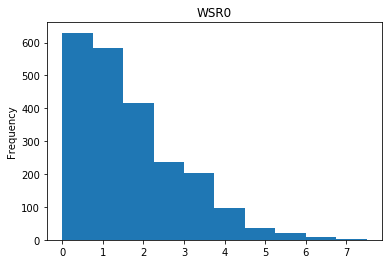

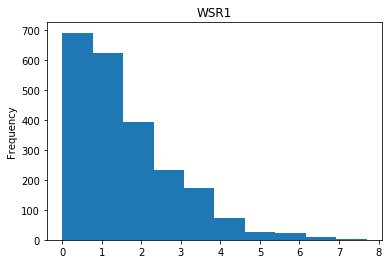

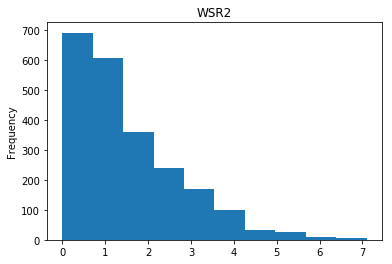

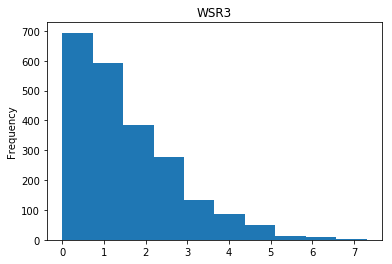

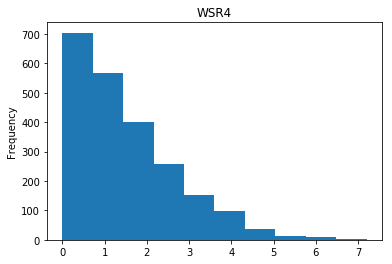

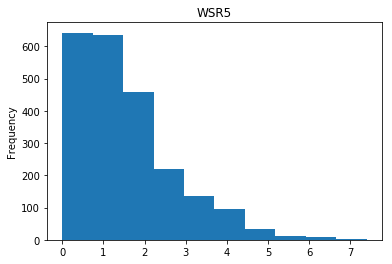

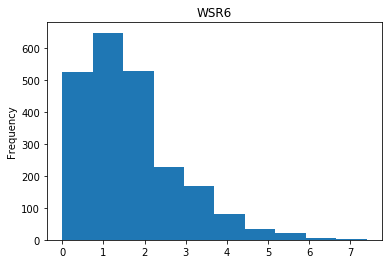

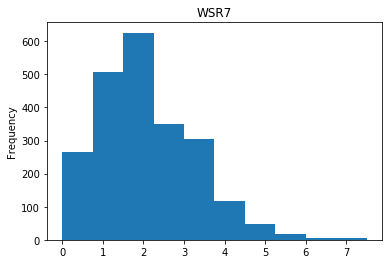

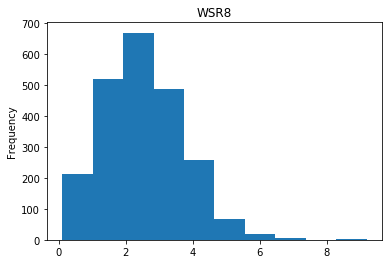

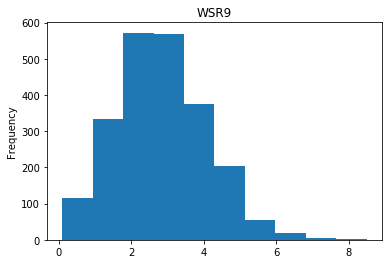

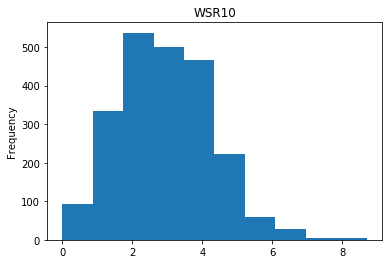

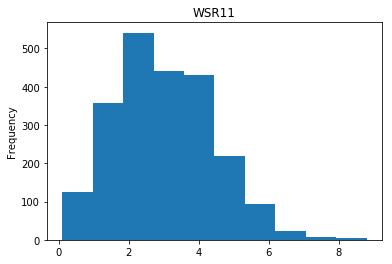

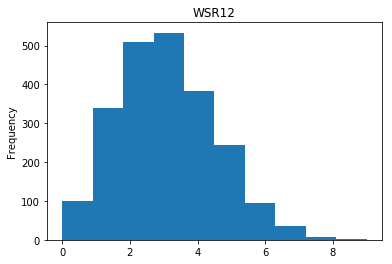

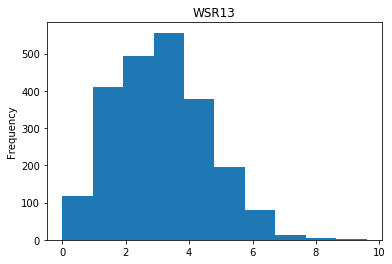

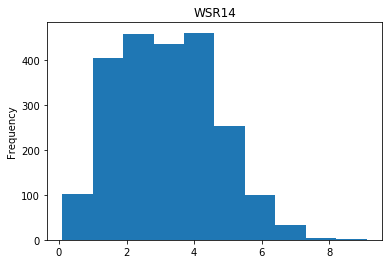

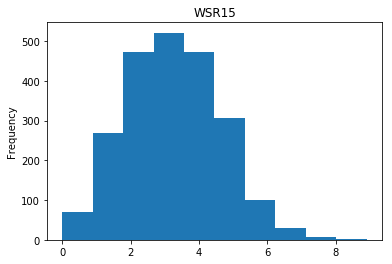

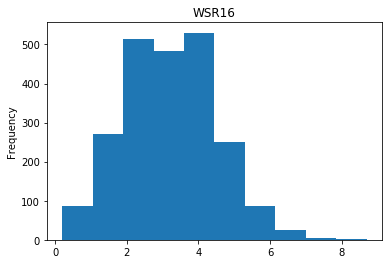

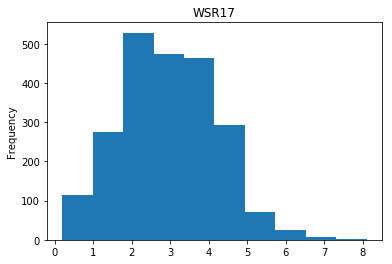

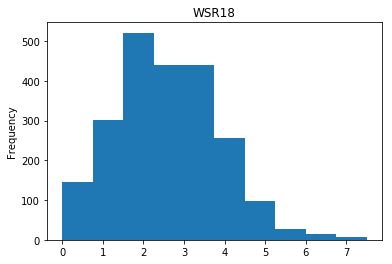

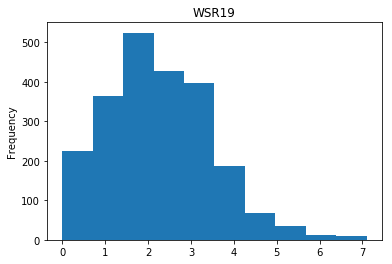

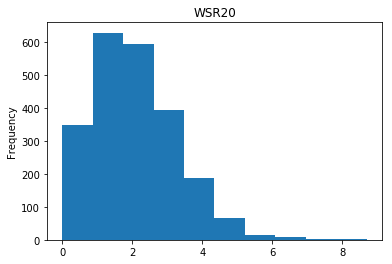

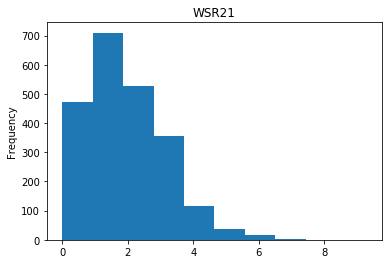

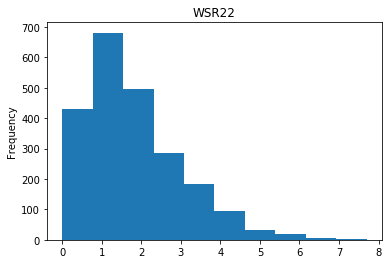

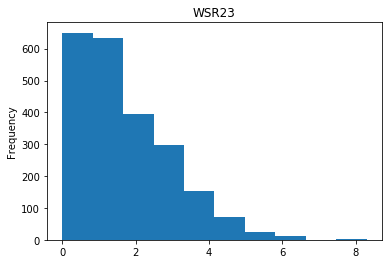

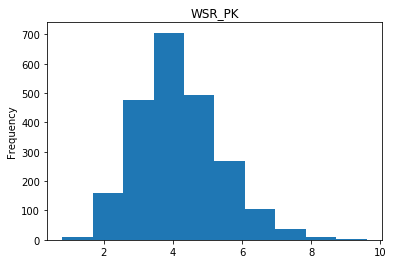

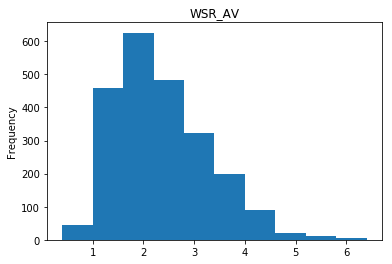

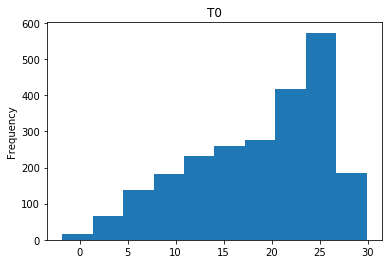

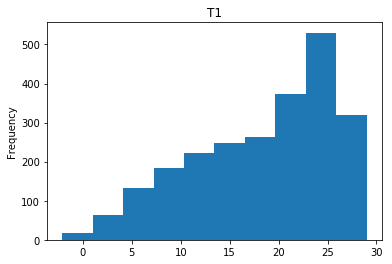

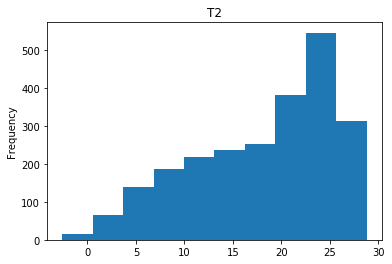

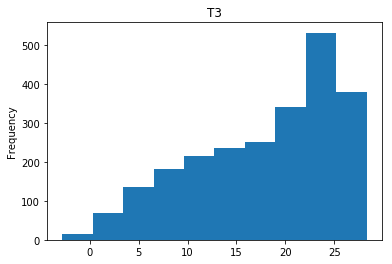

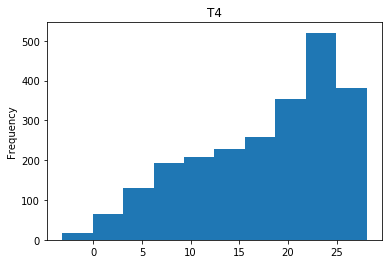

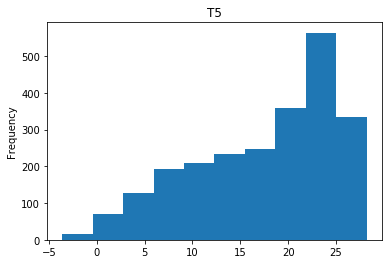

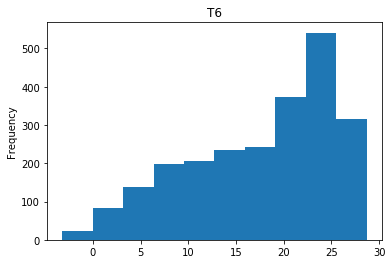

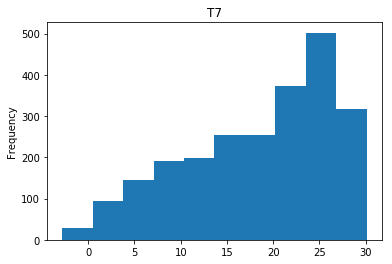

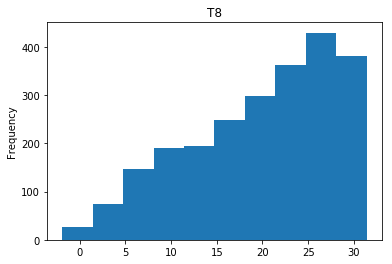

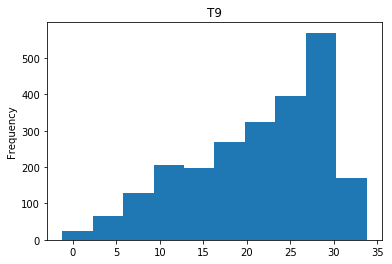

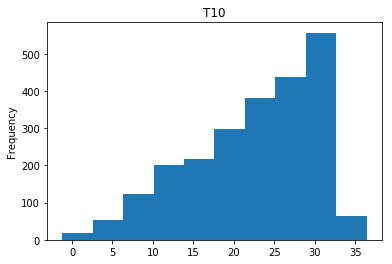

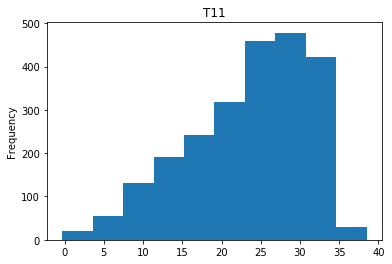

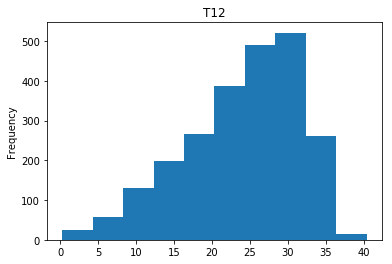

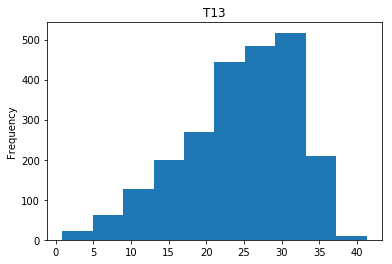

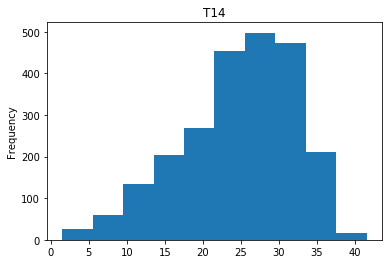

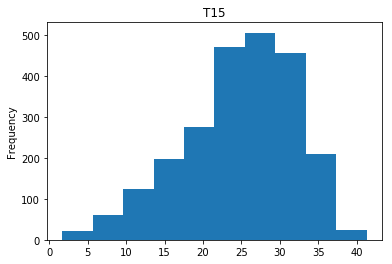

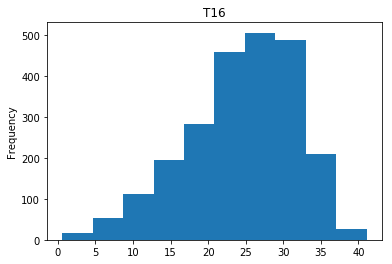

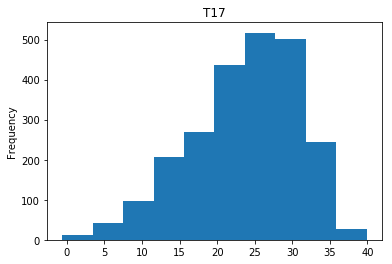

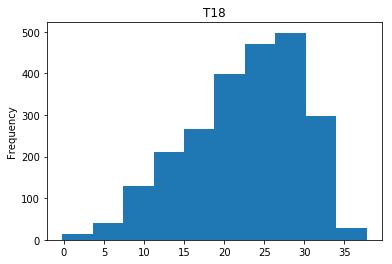

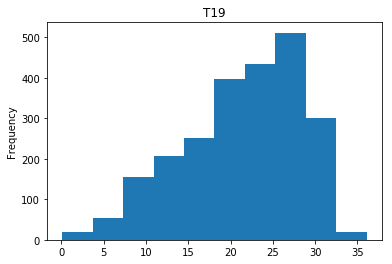

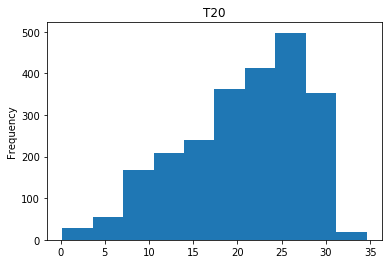

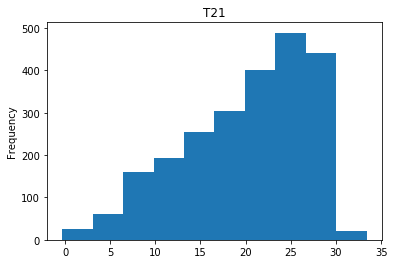

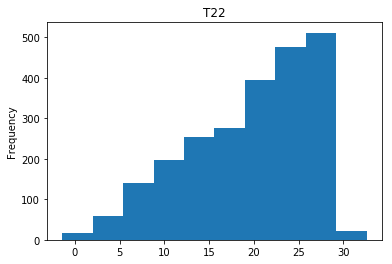

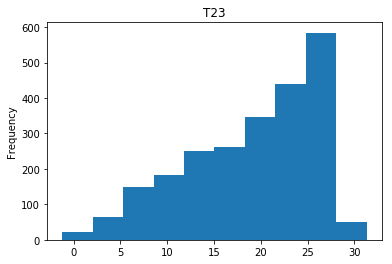

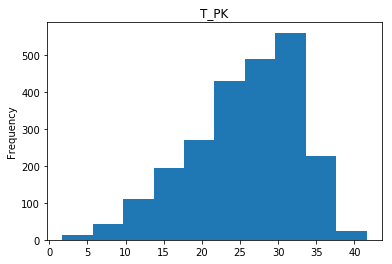

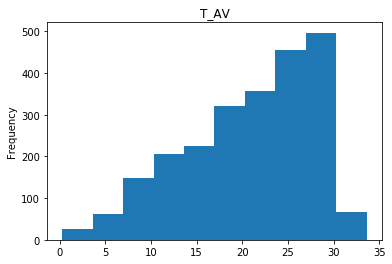

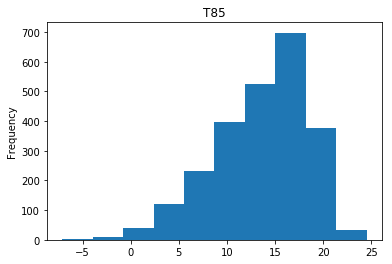

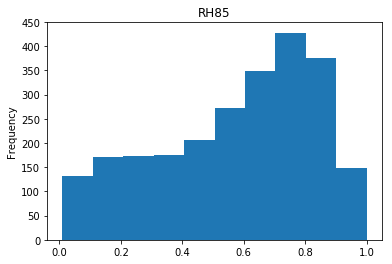

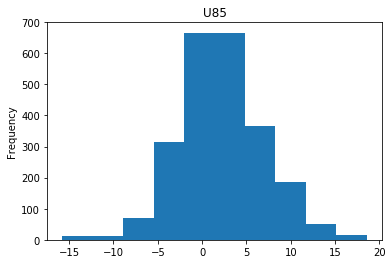

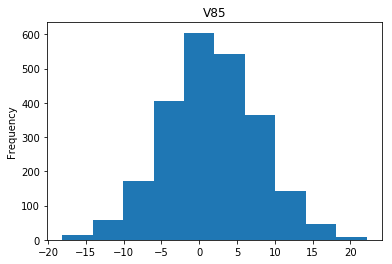

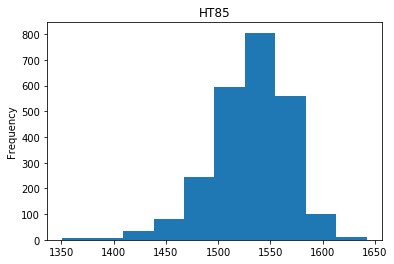

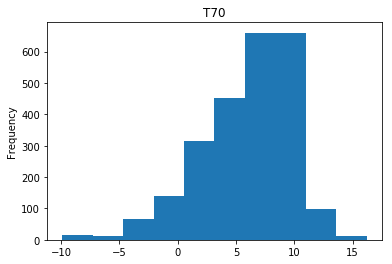

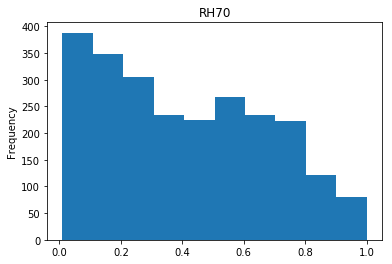

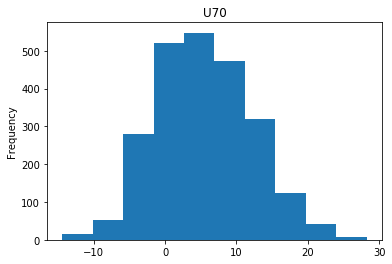

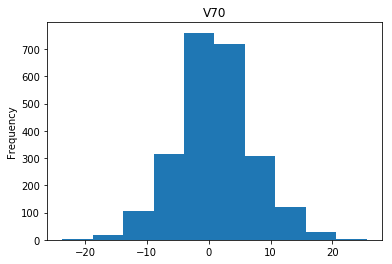

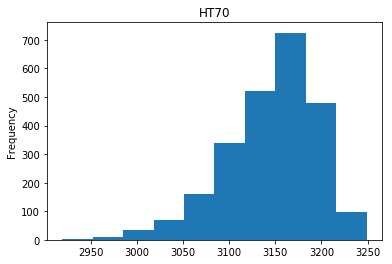

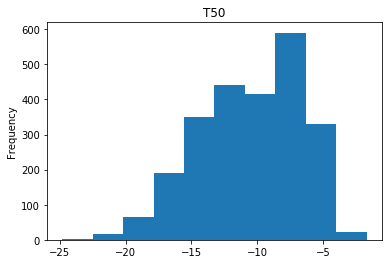

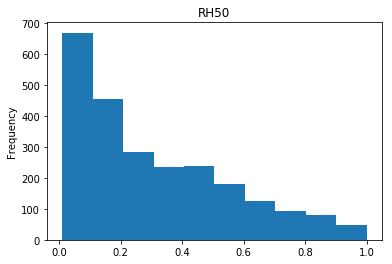

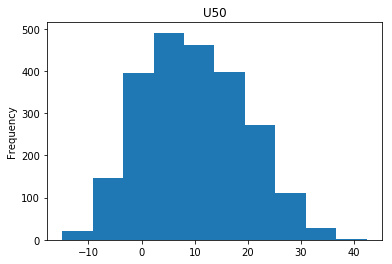

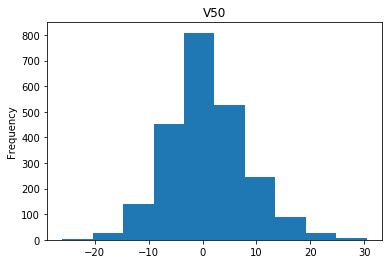

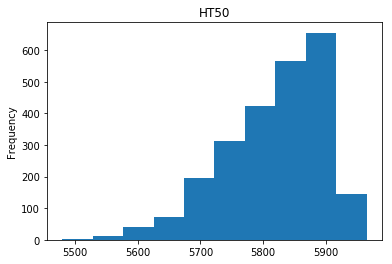

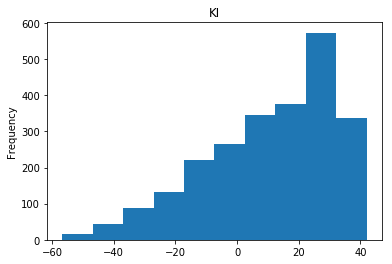

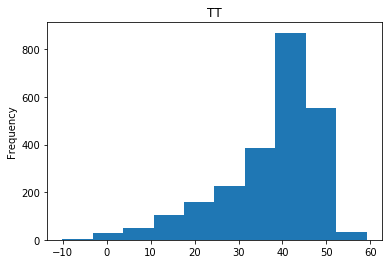

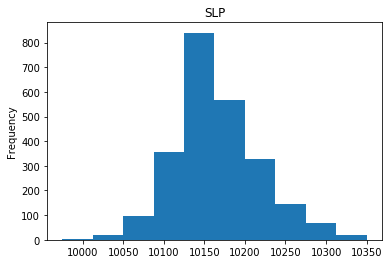

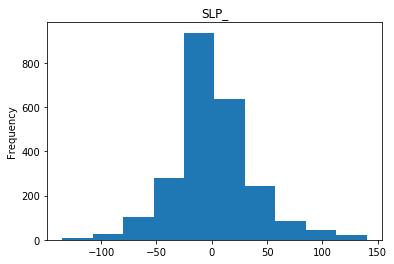

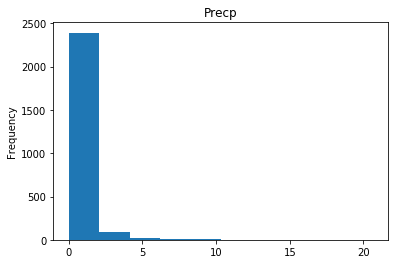

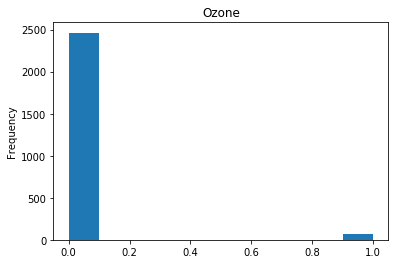

In [7]:
col_num = df.select_dtypes("number").columns.ravel()
outdir = "output/fig/hist"
mkdir(outdir)
for name in col_num:
    fig = df[name].plot("hist", title=name)
    plt.savefig(outdir+"/"+name+".png")
    plt.show()
    plt.close('all')

### Categorical variables

    カテゴリカルデータの分布

In [8]:
col_cate = df.select_dtypes("object").columns.ravel()
outdir = "output/fig/categorical"
mkdir(outdir)
for i, name in enumerate(col_cate):
    fig = df[name].value_counts().plot("bar", title=name)
    plt.savefig(outdir+"/"+name+".png")
    plt.show()
    plt.close('all')

Create directory: output/fig/categorical


## Correlation among numeric variables

    変数間の相関を可視化する

### Correlation matrix

    ピアソンの相関係数の行列

In [9]:
num_col = df.select_dtypes("number").columns.ravel()
cor = df.loc[:, num_col].corr()
display("Corelation matrix")
display(cor)
outdir = "output/csv"
cor.to_csv(outdir+"/corr.csv")

'Corelation matrix'

,WSR0,WSR1,WSR2,WSR3,WSR4,WSR5,WSR6,WSR7,WSR8,WSR9,WSR10,WSR11,WSR12,WSR13,WSR14,WSR15,WSR16,WSR17,WSR18,WSR19,WSR20,WSR21,WSR22,WSR23,WSR_PK,WSR_AV,T0,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18,T19,T20,T21,T22,T23,T_PK,T_AV,T85,RH85,U85,V85,HT85,T70,RH70,U70,V70,HT70,T50,RH50,U50,V50,HT50,KI,TT,SLP,SLP_,Precp,Ozone
WSR0,1.000e+00,0.920,0.860,0.804,0.754,0.704,0.667,0.598,0.544,0.502,0.469,0.442,0.417,0.387,0.345,0.332,0.307,2.571e-01,0.245,2.647e-01,0.279,0.326,0.336,0.347,0.508,0.686,-0.006,6.354e-04,-0.002,-4.188e-03,-1.132e-02,-2.105e-02,-0.040,-0.085,-0.149,-0.204,-0.241,-0.256,-0.264,-0.263,-0.261,-0.259,-0.258,-2.502e-01,-0.241,-0.233,-0.224,-0.218,-0.214,-2.056e-01,-0.247,-1.694e-01,-0.039,0.147,0.210,0.425,-0.244,-0.018,0.085,0.233,0.427,-0.195,-0.130,1.339e-01,0.238,3.583e-01,-0.159,0.106,0.164,-0.126,-0.126,1.042e-01,-0.124
WSR1,9.201e-01,1.000,0.925,0.852,0.803,0.747,0.710,0.642,0.577,0.528,0.487,0.462,0.430,0.395,0.351,0.339,0.312,2.590e-01,0.240,2.535e-01,0.263,0.314,0.325,0.340,0.518,0.708,-0.033,-2.508e-02,-0.026,-2.921e-02,-3.796e-02,-4.855e-02,-0.068,-0.114,-0.182,-0.238,-0.277,-0.293,-0.301,-0.299,-0.297,-0.294,-0.294,-2.856e-01,-0.276,-0.268,-0.260,-0.254,-0.249,-2.407e-01,-0.280,-2.027e-01,-0.061,0.146,0.209,0.389,-0.253,-0.043,0.093,0.248,0.419,-0.214,-0.146,1.230e-01,0.249,3.603e-01,-0.180,0.103,0.156,-0.114,-0.114,1.164e-01,-0.127
WSR2,8.602e-01,0.925,1.000,0.917,0.847,0.786,0.747,0.675,0.608,0.561,0.517,0.493,0.466,0.431,0.389,0.362,0.330,2.670e-01,0.242,2.572e-01,0.266,0.320,0.334,0.349,0.536,0.735,-0.067,-5.646e-02,-0.053,-5.487e-02,-6.405e-02,-7.487e-02,-0.095,-0.144,-0.213,-0.271,-0.309,-0.325,-0.333,-0.330,-0.331,-0.331,-0.331,-3.225e-01,-0.312,-0.302,-0.292,-0.286,-0.280,-2.718e-01,-0.315,-2.358e-01,-0.093,0.142,0.220,0.390,-0.258,-0.068,0.088,0.269,0.423,-0.233,-0.171,1.103e-01,0.283,3.749e-01,-0.203,0.090,0.141,-0.095,-0.127,1.105e-01,-0.133
WSR3,8.035e-01,0.852,0.917,1.000,0.914,0.846,0.789,0.709,0.627,0.576,0.530,0.507,0.481,0.443,0.399,0.364,0.325,2.587e-01,0.240,2.595e-01,0.269,0.317,0.334,0.348,0.534,0.742,-0.097,-8.582e-02,-0.078,-7.786e-02,-8.563e-02,-9.635e-02,-0.118,-0.169,-0.241,-0.299,-0.337,-0.353,-0.361,-0.359,-0.359,-0.358,-0.358,-3.468e-01,-0.334,-0.324,-0.312,-0.306,-0.298,-2.902e-01,-0.344,-2.618e-01,-0.111,0.146,0.220,0.366,-0.277,-0.085,0.089,0.272,0.411,-0.257,-0.187,1.097e-01,0.296,3.688e-01,-0.225,0.082,0.135,-0.094,-0.120,1.171e-01,-0.135
WSR4,7.542e-01,0.803,0.847,0.914,1.000,0.914,0.836,0.736,0.629,0.569,0.527,0.505,0.483,0.440,0.392,0.359,0.315,2.414e-01,0.221,2.382e-01,0.248,0.294,0.312,0.332,0.525,0.731,-0.123,-1.129e-01,-0.106,-1.045e-01,-1.088e-01,-1.185e-01,-0.142,-0.196,-0.267,-0.324,-0.361,-0.375,-0.382,-0.382,-0.381,-0.381,-0.380,-3.673e-01,-0.355,-0.345,-0.333,-0.325,-0.317,-3.088e-01,-0.367,-2.859e-01,-0.131,0.154,0.188,0.337,-0.270,-0.109,0.099,0.258,0.396,-0.263,-0.190,1.115e-01,0.289,3.579e-01,-0.234,0.079,0.122,-0.075,-0.110,1.413e-01,-0.123
WSR5,7.035e-01,0.747,0.786,0.846,0.914,1.000,0.904,0.757,0.650,0.585,0.538,0.509,0.483,0.445,0.400,0.370,0.318,2.466e-01,0.224,2.466e-01,0.253,0.299,0.321,0.345,0.528,0.729,-0.133,-1.223e-01,-0.116,-1.141e-01,-1.168e-01,-1.240e-01,-0.148,-0.203,-0.276,-0.333,-0.370,-0.385,-0.393,-0.393,-0.394,-0.397,-0.396,-3.840e-01,-0.368,-0.356,-0.343,-0.334,-0.323,-3.143e-01,-0.379,-2.964e-01,-0.136,0.141,0.171,0.325,-0.279,-0.116,0.088,0.258,0.380,-0.273,-0.199,1.032e-01,0.281,3.500e-01,-0.244,0.065,0.111,-0.078,-0.104,1.330e-01,-0.120
WSR6,6.667e-01,0.710,0.747,0.789,0.836,0.904,1.000,0.853,0.707,0.621,0.568,0.526,0.487,0.448,0.406,0.377,0.334,2.712e-01,0.255,2.623e-01,0.268,0.307,0.330,0.352,0.534,0.736,-0.089,-7.935e-02,-0.074,-7.132e-02,-7.322e-02,-7.858e-02,-0.098,-0.152,-0.226,-0.286,-0.326,-0.341,-0.352,-0.354,-0.356,-0.358,-0.356,-3.430e-01,-0.325,-0.312,-0.301,-0.292,-0.282,-2.738e-01,-0.335,-2.513e-01,-0.099,0.151,0.155,0.323,-0.258,-0.081,0.087,0.223,0.364,-0.236,-0.152,9.276e-02,0.241,3.421e-01,-0.

### Corelation heatmap

    相関行列のヒートマップ表現

'Corelation heatmap'

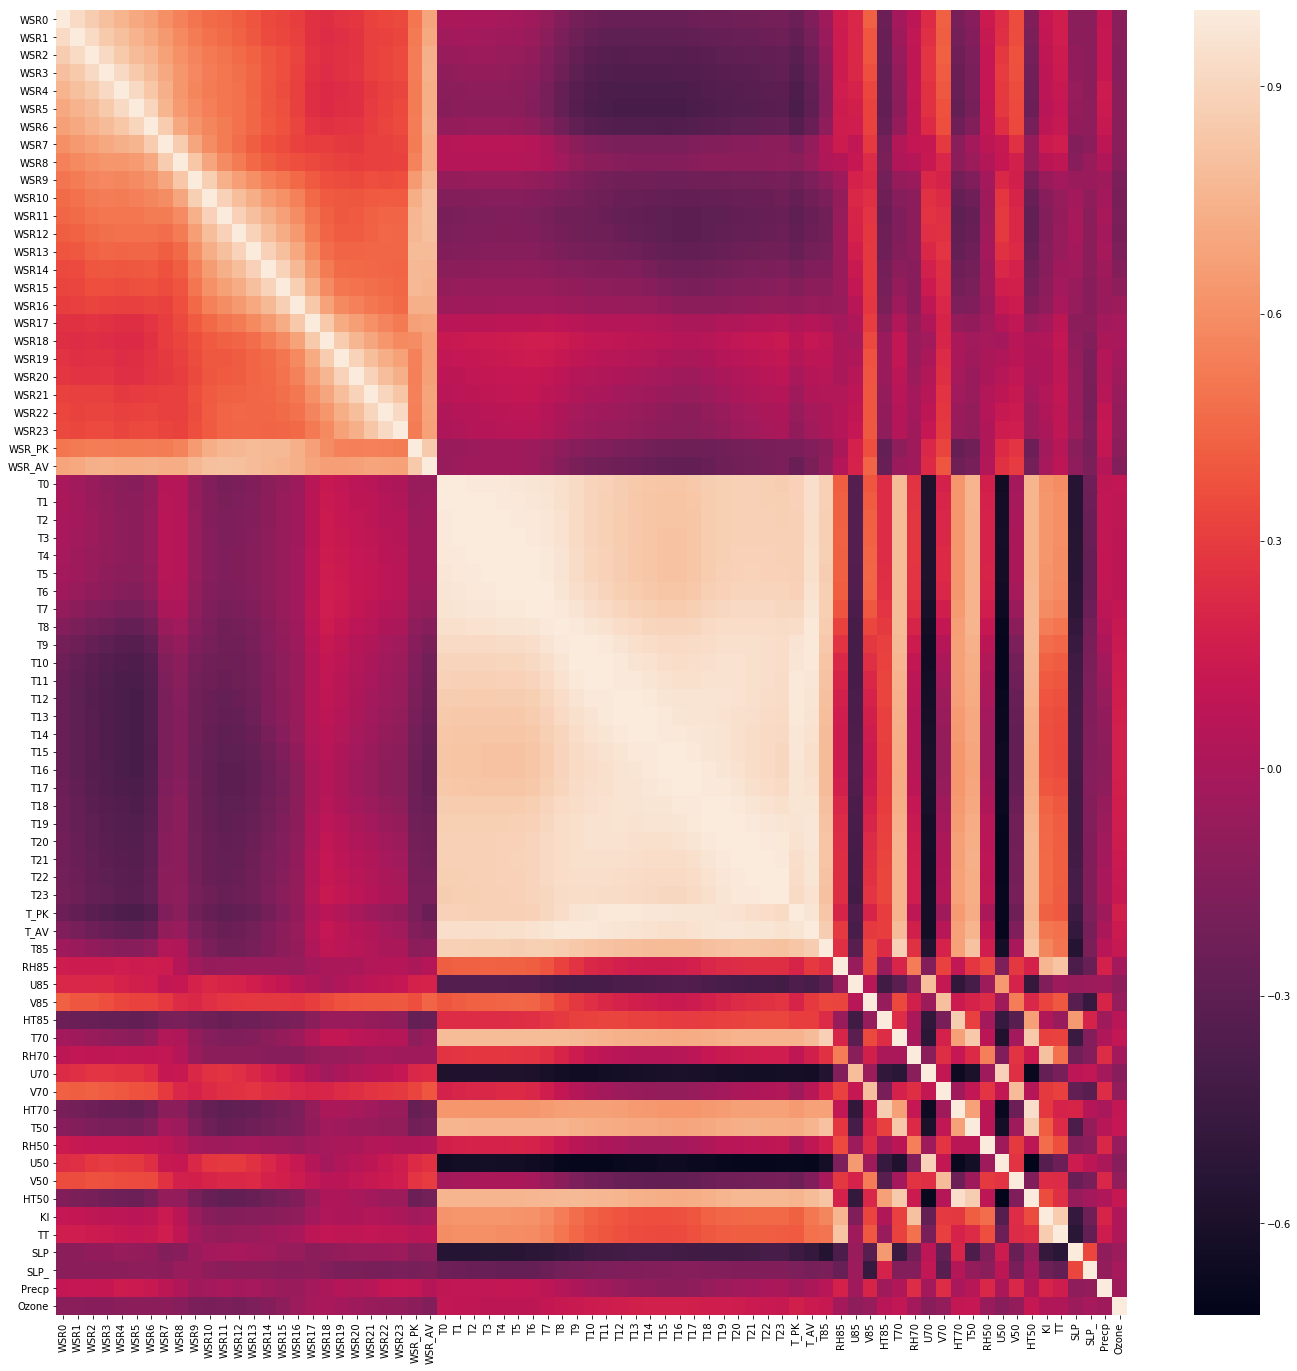

In [10]:
display("Corelation heatmap")
plt.figure(figsize=(24, 24))
sns_plot = sns.heatmap(cor)
outdir = "output/fig"
plt.savefig(outdir+"/corplot.png")

### Variable pairs which is highly corelated

    相関係数の高い変数の組の一覧 (デフォルトは0.95。必要に応じてセル内の値を変更すること)

In [12]:
cor_threshold = 0.95
cor_tri = pd.DataFrame(np.triu(cor.values, k=1), index=num_col, columns=num_col)
corpair = pd.DataFrame({
    "var1": cor_tri.columns.ravel()[np.where(cor_tri.values > cor_threshold)[0]],
    "var2": cor_tri.columns.ravel()[np.where(cor_tri.values > cor_threshold)[1]],
    "cor": cor_tri.values[np.where(cor_tri.values > cor_threshold)],
}, columns = ["var1", "var2", "cor"]
)
display(corpair)
outdir = "output/csv"
corpair.to_csv(outdir+"/pair_cor_"+str(cor_threshold)+".csv", index=False)

,var1,var2,cor
0,T0,T1,0.998
1,T0,T2,0.993
2,T0,T3,0.988
3,T0,T4,0.982
4,T0,T5,0.976
5,T0,T6,0.972
6,T0,T7,0.966
7,T1,T2,0.998
8,T1,T3,0.994
9,T1,T4,0.988


## Data topology

    データを2次元空間にプロットし、データのばらつきを可視化する
    カテゴリカルなデータはダミー展開する (極端にカテゴリ数が多い場合、時間がかかる)
    欠損値は列方向で中央値補完 (全行欠損の列はまるごと削除)

### PCA

    PCAの上位2成分による次元圧縮

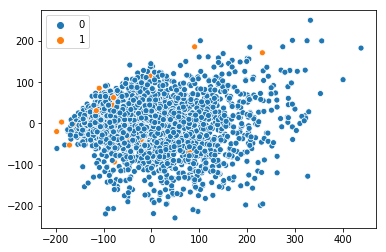

In [13]:
X = pd.get_dummies(df.fillna(df.mean()).dropna(axis=1).drop([obj_column, time_column], axis=1)).values
y = df[obj_column].values
pca_res = PCA(n_components=2).fit_transform(X)
sns.scatterplot(x=pca_res[:,0], y=pca_res[:,1], hue=y)
outdir = "output/fig"
plt.savefig(outdir+"/pca.png")

### t-SNE

    非線形変換（データ点同士の類似度を保つ次元削減）による次元圧縮
    レコード数が多いと計算時間がかかるので、サクッと見たい場合は削除すること
    (目安として10万行200列で2h程度、20万行100列で8h程度)

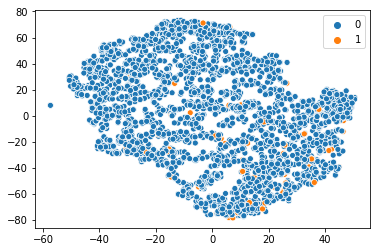

In [14]:
tsne_res = TSNE(n_components=2, random_state=0).fit_transform(X)
sns.scatterplot(x=tsne_res[:,0], y=tsne_res[:,1], hue=y)
outdir = "output/fig"
plt.savefig(outdir+"/tsne.png")